# 0. Setup

In [2]:
import tensorflow as tf
from utils import Dataset, plot_image
# from models.capsnet.capsnet import CapsNet

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

# 1. Dataset

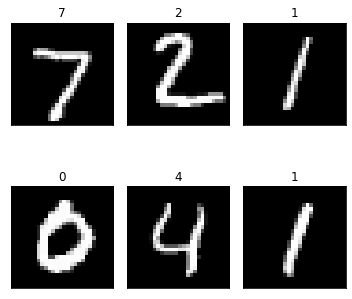

(28, 28, 1) (10,)


In [15]:
data_name_1 = 'MNIST'
dataset_1 = Dataset(data_name_1)

plot_image(dataset_1.x_test[:6,...,0], dataset_1.y_test[:6], dataset_1.class_names)

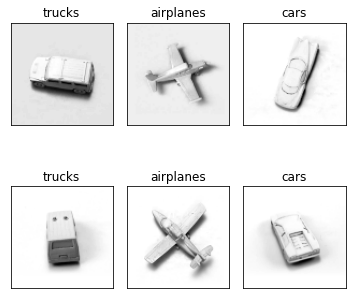

In [6]:
data_name_2 = 'SMALLNORB'
dataset_2 = Dataset(data_name_2)

plot_image(dataset_2.x_test[:6,...,0], dataset_2.y_test[:6], dataset_2.class_names)

# 2. Load Model

In [ ]:
model_train = 